In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
#import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(Measurement.date)).first()[0]
#latest_date = str(latest_date)
latest_date

'2017-08-23'

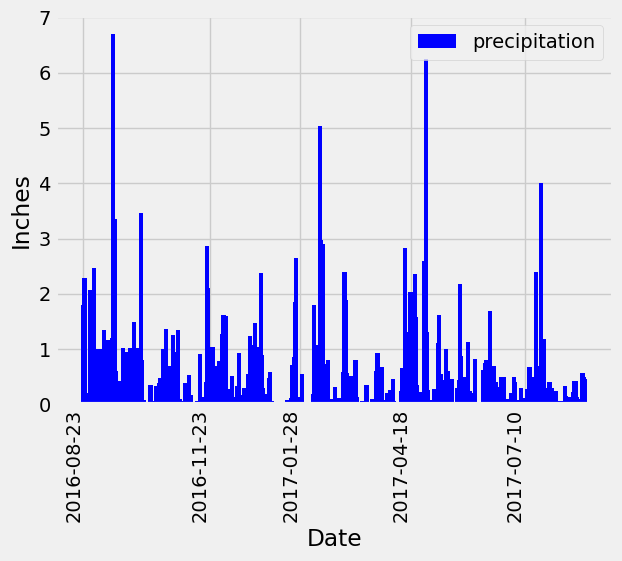

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#latest_date = session.query(func.max(Measurement.date)).first()
#latest_date = str(latest_date)
latest_date_df = datetime.strptime(latest_date, "%Y-%m-%d").date()

# Calculate the date one year from the last date in data set.
year_ago = latest_date_df - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(data)
data_df = data_df.rename(columns={"date": "Date", "prcp": "Precipitation (in)"})

# Sort the dataframe by date
sorted_df = data_df.sort_values(by=["Date"], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = sorted_df["Date"]
y_axis = sorted_df["Precipitation (in)"]
plt.bar(x_axis, y_axis, color='blue', width=3)
show_xticks = ['2016-08-23', '2016-11-23', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(show_xticks, rotation='vertical', ha='right')

plt.ylabel("Inches")
plt.xlabel("Date")

plt.legend(['precipitation'])

plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation (in)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
station_count

9

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
max_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()[0][0]
max_station
    

'USC00519281'

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tmin,tmax,tmean = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == max_station).all()[0]
print(f"min:{tmin}, max:{tmax}, avg:{tmean:.1f}")
    

min:54.0, max:85.0, avg:71.7


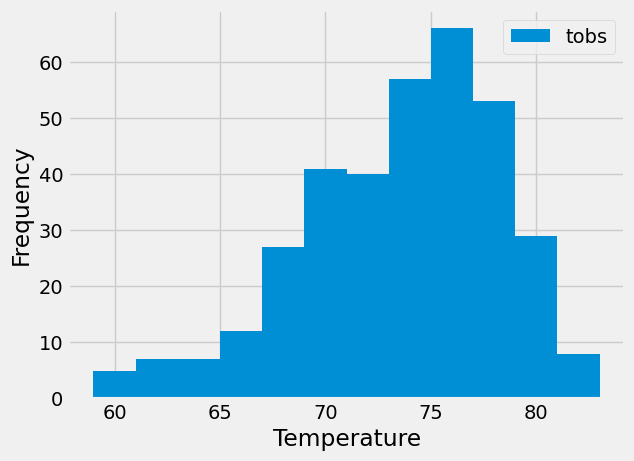

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurement.tobs).filter(Measurement.station == max_station).\
    filter(Measurement.date>=year_ago).all()
df = pd.DataFrame(data, columns=["tobs"])
df.plot.hist(bins=12) 
plt.xlabel("Temperature")   
plt.show()

# Close Session

In [46]:
# Close Session
session.close()